In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

In [7]:


# Build the model
def auto(inputs):
    # Encoder: Compressing the input to 32 units
    encoder = tf.keras.layers.Dense(units=32, activation="relu")(inputs)  # Latent representation of 32 units
    
    # Decoder: Reconstructing the input from the compressed form
    decoder = tf.keras.layers.Dense(units=784, activation="sigmoid")(encoder)  # Output size is 784 to match original input
    return encoder, decoder

# Set the input shape (flattened MNIST images of 28x28 = 784 pixels)
inputs = tf.keras.layers.Input(shape=(784,))

# Get the encoder and decoder output
encoder_output, decoder_output = auto(inputs)

# Create the encoder model (for later visualization)
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output, name="encoder")

# Create the autoencoder model
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output, name="autoencoder")

# Compile the autoencoder model
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

# Model summaries
encoder_model.summary()  # Summary for the encoder
autoencoder_model.summary()  # Summary for the autoencoder


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model using Adam Optimizer , binary_crossentropy and  metrics=['accuracy']
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy")


In [10]:
# train the model using train_dataset,steps_per_epoch=step,epochs=10
step=60000//BATCH_SIZE
his=autoencoder.fit(train_dataset,steps_per_epoch=step,epochs=50)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3168
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1499
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1242
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1112
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1035
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0988
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0963
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0952
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0946
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0943
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0938
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0938
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0936
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0935
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

Text(0, 0.5, 'Loss')

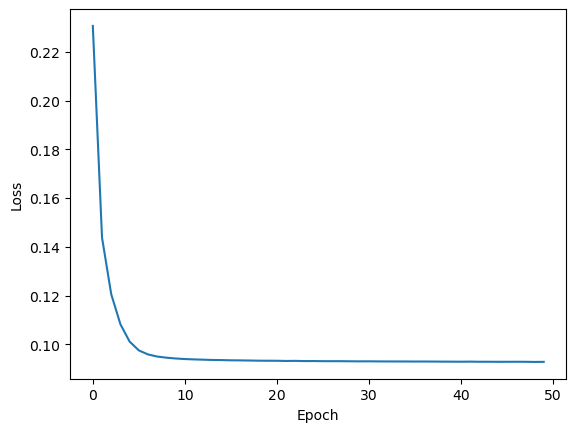

In [7]:
# This variable stores the outputs of the model comiplation 
plt.plot(his.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [8]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


2024-10-21 22:24:42.890146: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-10-21 22:24:42.890827: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-10-21 22:24:42.942492: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.

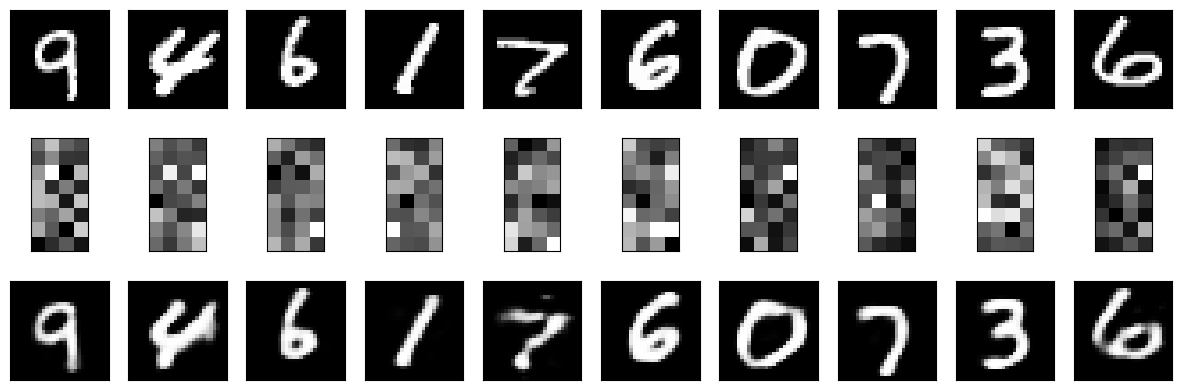

In [9]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])